<a href="https://colab.research.google.com/github/harinilakshman/Decision_Tree_Classification_Regression_Model/blob/main/Decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/irrigation_prediction.csv")

In [ ]:
print(df.describe())

            Soil_pH  Soil_Moisture  Organic_Carbon  Electrical_Conductivity  \
count  10000.000000   10000.000000    10000.000000             10000.000000   
mean       6.487857      36.969207        0.944731                 1.791963   
std        0.979963      16.430845        0.372406                 0.984202   
min        4.800000       8.000000        0.300000                 0.100000   
25%        5.640000      22.860000        0.620000                 0.940000   
50%        6.470000      37.240000        0.950000                 1.780000   
75%        7.350000      50.940000        1.260000                 2.650000   
max        8.200000      65.000000        1.600000                 3.500000   

       Temperature_C      Humidity   Rainfall_mm  Sunlight_Hours  \
count   10000.000000  10000.000000  10000.000000    10000.000000   
mean       26.991423     60.080339   1252.499420        7.518538   
std         8.664074     20.187973    715.582201        2.016077   
min        12.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  object 
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  object 
 11  Crop_Growth_Stage        10000 non-null  object 
 12  Season                   10000 non-null  object 
 13  Irrigation_Type          10000 non-null  object 
 14  Water_Source           

In [ ]:
df1=df.copy()

In [ ]:
#Seperate categorical and numerical features
numerical_features = df.select_dtypes(include=["int64", "float64"])
categorical_features = df.select_dtypes(include=["object", "category"])
print("Numerical Features:")
print(numerical_features.columns.tolist())

print("\nCategorical Features:")
print(categorical_features.columns.tolist())

Numerical Features:
['Soil_pH', 'Soil_Moisture', 'Organic_Carbon', 'Electrical_Conductivity', 'Temperature_C', 'Humidity', 'Rainfall_mm', 'Sunlight_Hours', 'Wind_Speed_kmh', 'Field_Area_hectare', 'Previous_Irrigation_mm']

Categorical Features:
['Soil_Type', 'Crop_Type', 'Crop_Growth_Stage', 'Season', 'Irrigation_Type', 'Water_Source', 'Mulching_Used', 'Region', 'Irrigation_Need']


In [ ]:
import matplotlib.pyplot as plt

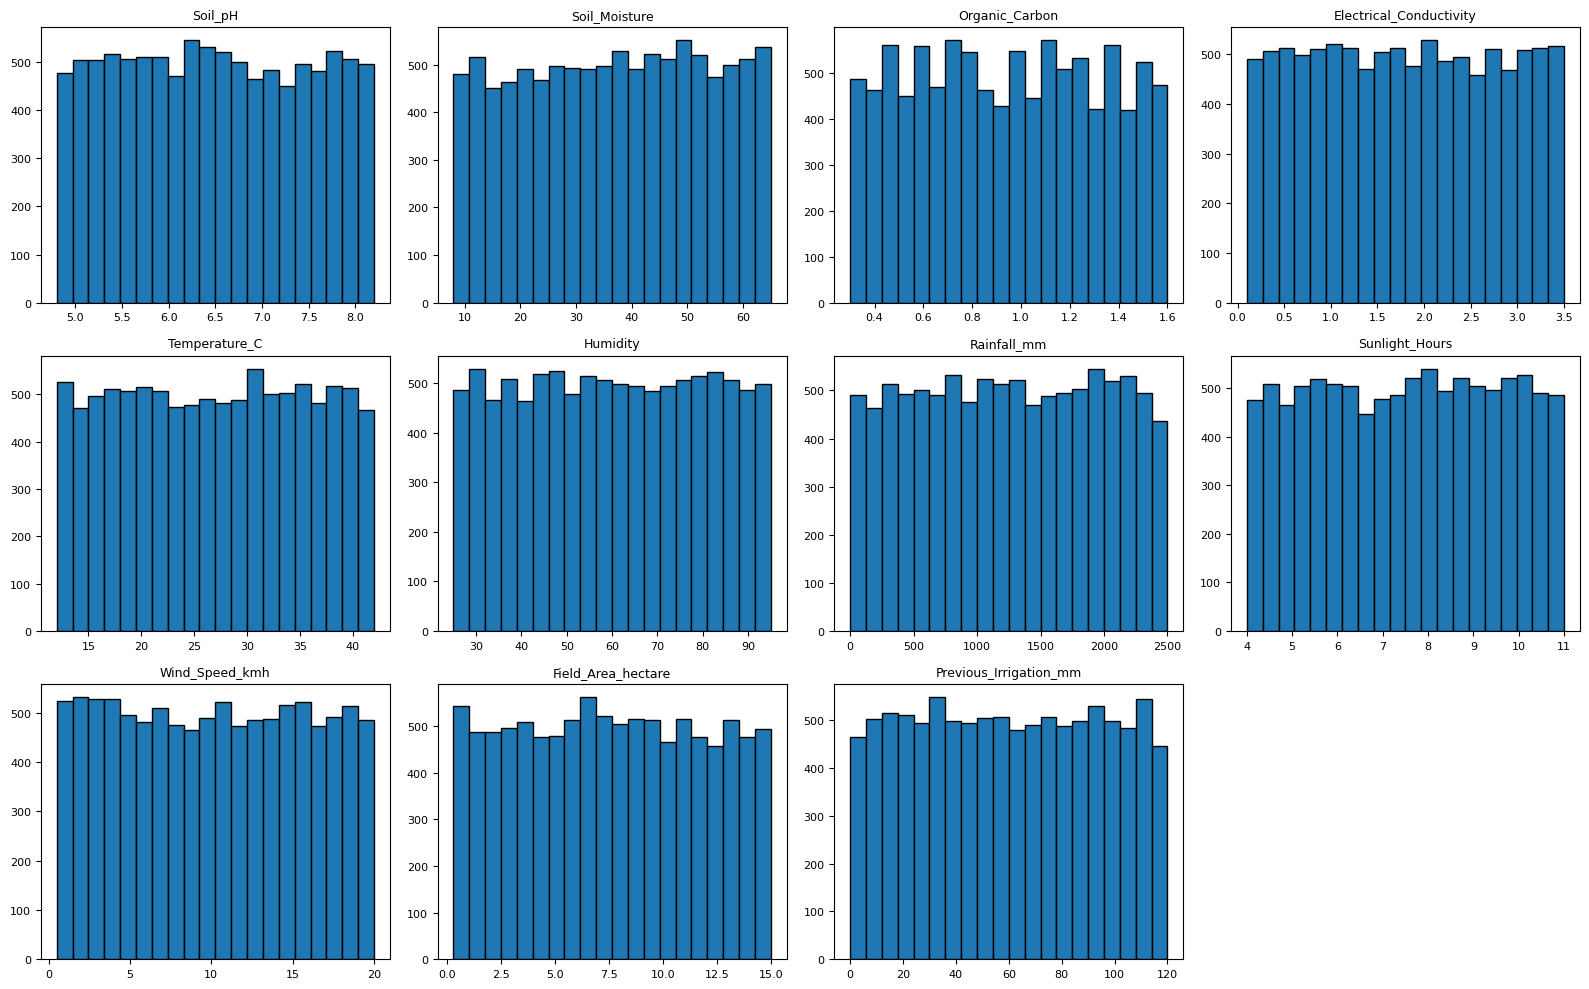

In [ ]:
num_cols = numerical_features.columns
n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(numerical_features[col].dropna(), bins=20, edgecolor='black')
    plt.title(col, fontsize=9)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


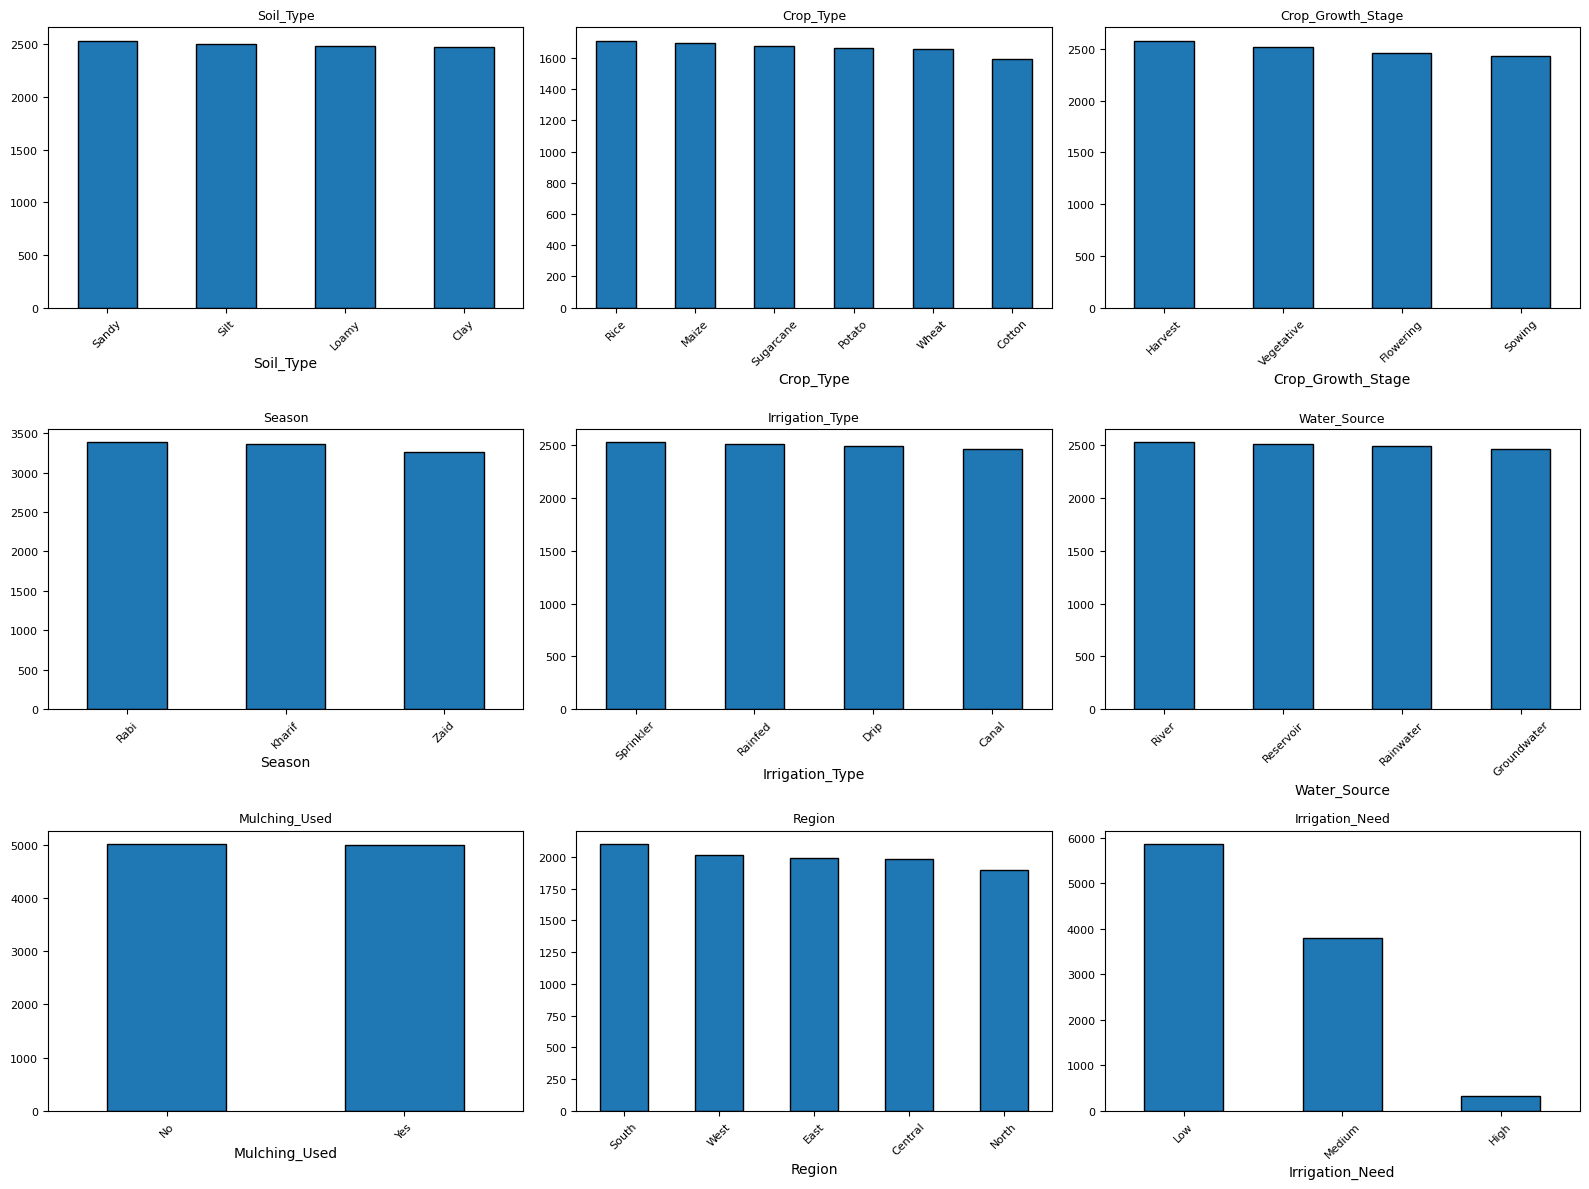

In [ ]:
cat_cols = categorical_features.columns
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    categorical_features[col].value_counts().plot(
        kind='bar', edgecolor='black'
    )
    plt.title(col, fontsize=9)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


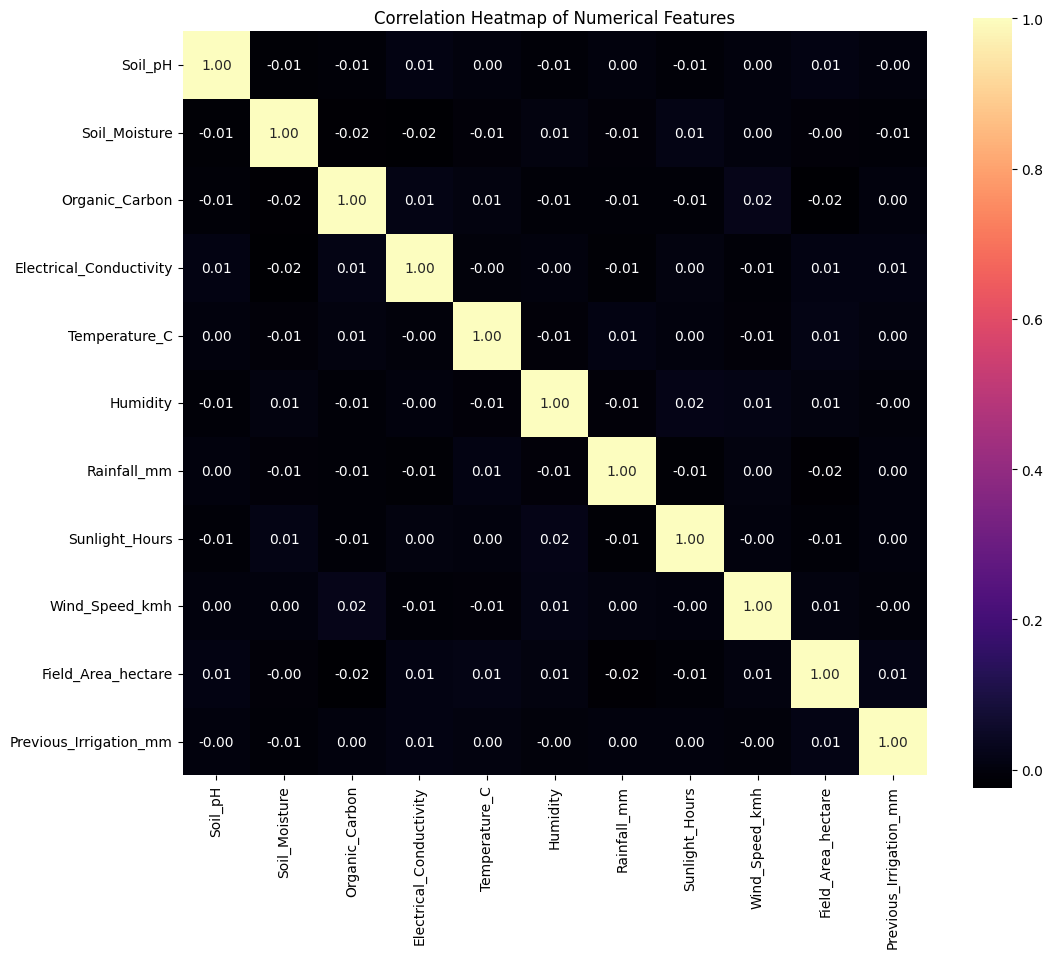

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 10))
corr = numerical_features.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="magma", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



/tmp/ipython-input-3395493736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-3395493736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-3395493736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
/tmp/ipython-input-3395493736.py:12: FutureWarning: 

Passing `palette` without assignin

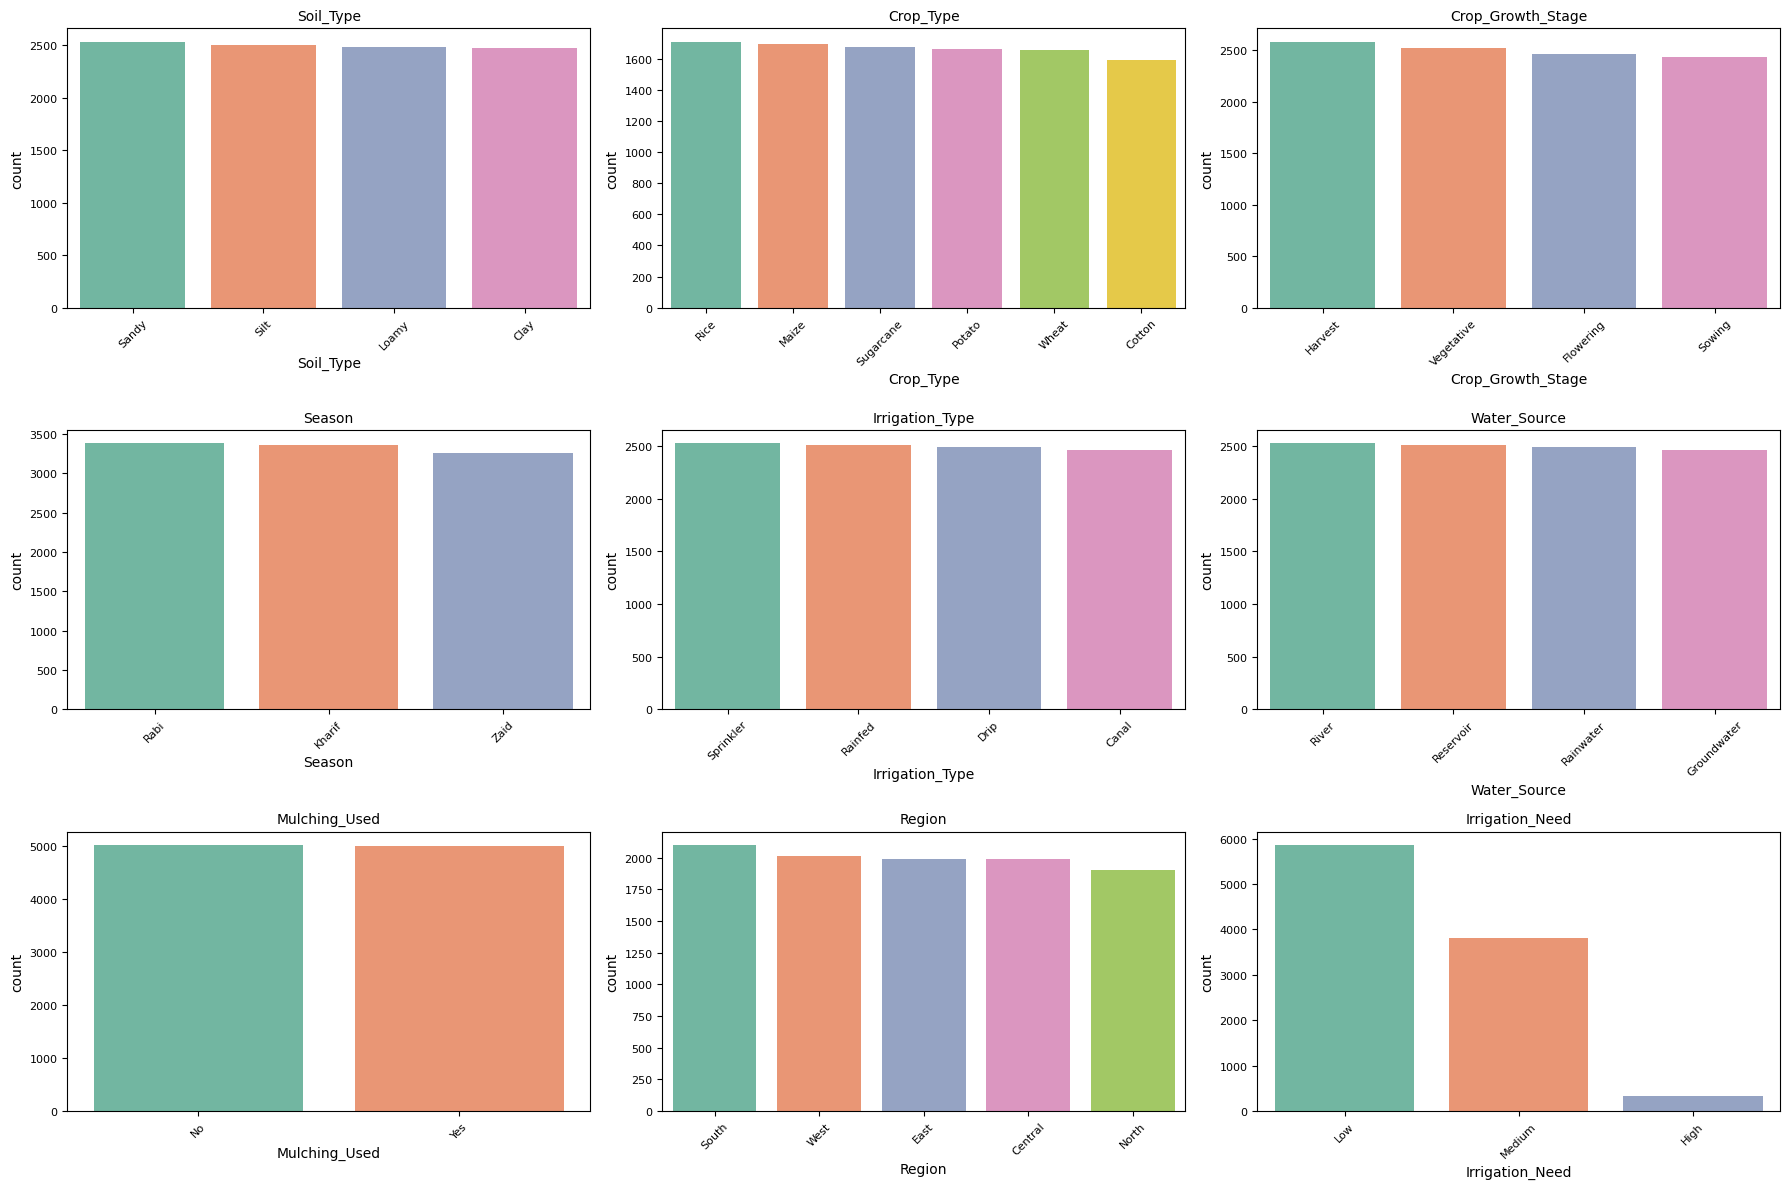

In [ ]:
#Countplot
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = categorical_features.columns
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2")
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


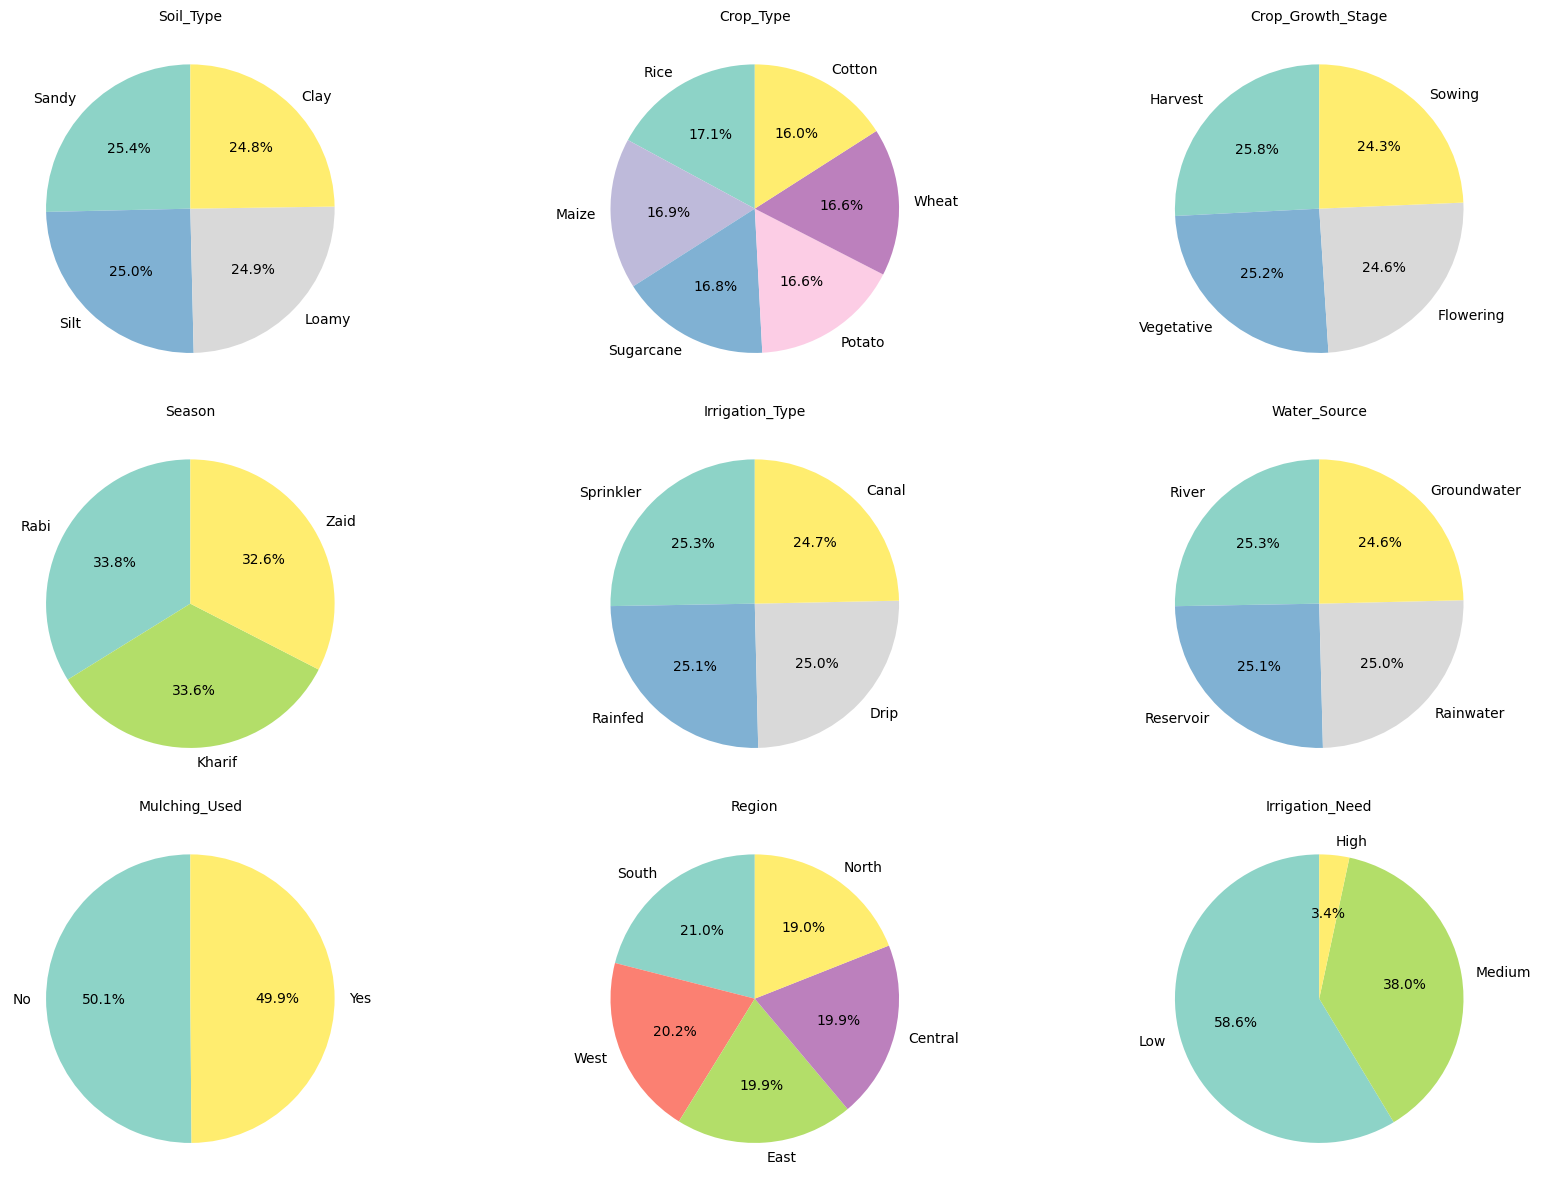

In [ ]:
#Pie chart
import matplotlib.pyplot as plt

cat_cols = categorical_features.columns
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].value_counts().plot(
        kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False
    )
    plt.title(col, fontsize=10)
    plt.ylabel("")  # remove y-label for cleaner look

plt.tight_layout()
plt.show()


In [ ]:
#label encoding for  categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_features.columns:
    df1[col] = le.fit_transform(df1[col].astype(str))  # convert to string to avoid errors

df1.head()


,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,5,3,1,2,2,4.73,1,1.98,3,1
1,3,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,1,0,2,0,0,12.22,1,33.56,0,2
2,2,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,0,1,1,1,2,5.52,1,34.62,3,1
3,0,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,5,2,0,0,2,1.43,1,84.03,2,2
4,0,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,0,2,2,0,3,2.52,0,60.86,3,2


In [ ]:
#min max scaler for numerical
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform only numerical columns
df1[numerical_features.columns] = scaler.fit_transform(df1[numerical_features.columns])

df1.head()


,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,0.394118,0.499649,0.092308,0.608824,0.330000,0.088429,0.467057,0.001429,0.075385,5,3,1,2,2,0.301361,1,0.016337,3,1
1,3,0.473529,0.746667,0.061538,0.038235,0.816667,0.014429,0.332452,0.960000,0.836923,1,0,2,0,0,0.810884,1,0.279570,0,2
2,2,0.855882,0.562632,0.607692,0.611765,0.994333,0.734429,0.737832,0.535714,0.950256,0,1,1,1,2,0.355102,1,0.288405,3,1
3,0,0.341176,0.083333,0.969231,0.088235,0.840667,0.261714,0.122386,0.700000,0.561026,5,2,0,0,2,0.076871,1,0.700258,2,2
4,0,0.870588,0.185614,0.500000,0.711765,0.346000,0.877714,0.750307,0.912857,0.551795,0,2,2,0,3,0.151020,0,0.507127,3,2


In [ ]:
y=df1['Irrigation_Need']
X = df1.drop(columns=['Irrigation_Need'])

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test (you can adjust test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (8000, 19)
X_test: (2000, 19)
y_train: (8000,)
y_test: (2000,)


In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on training data
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.7220
Confusion Matrix:
 [[ 14   0  53]
 [  0 971 202]
 [  4 297 459]]


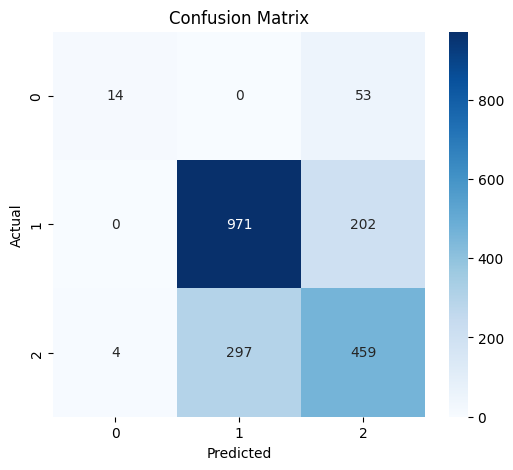

In [ ]:
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# print("Classification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# y_test and y_pred are already defined
report = classification_report(y_test, y_pred)
print("Performance Metrics:\n")
print(report)


Performance Metrics:

              precision    recall  f1-score   support

           0       0.78      0.21      0.33        67
           1       0.77      0.83      0.80      1173
           2       0.64      0.60      0.62       760

    accuracy                           0.72      2000
   macro avg       0.73      0.55      0.58      2000
weighted avg       0.72      0.72      0.71      2000



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)


In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


Decision Tree Accuracy: 0.9955


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
report = pd.DataFrame(results)
report = report.sort_values(by="F1 Score", ascending=False)
report

,Model,Accuracy,Precision,Recall,F1 Score
3,Gradient Boosting,0.9965,0.996532,0.9965,0.996412
1,Decision Tree,0.9955,0.995512,0.9955,0.995504
2,Random Forest,0.9865,0.986823,0.9865,0.985616
4,AdaBoost,0.8905,0.914995,0.8905,0.885162
6,SVM,0.8150,0.788860,0.8150,0.801639
7,Naive Bayes,0.8060,0.809436,0.8060,0.792987
0,Logistic Regression,0.7220,0.719467,0.7220,0.714303
5,KNN,0.6660,0.644166,0.6660,0.648512


/tmp/ipython-input-2987766093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=report, x='Model', y='F1 Score', palette="Set2")


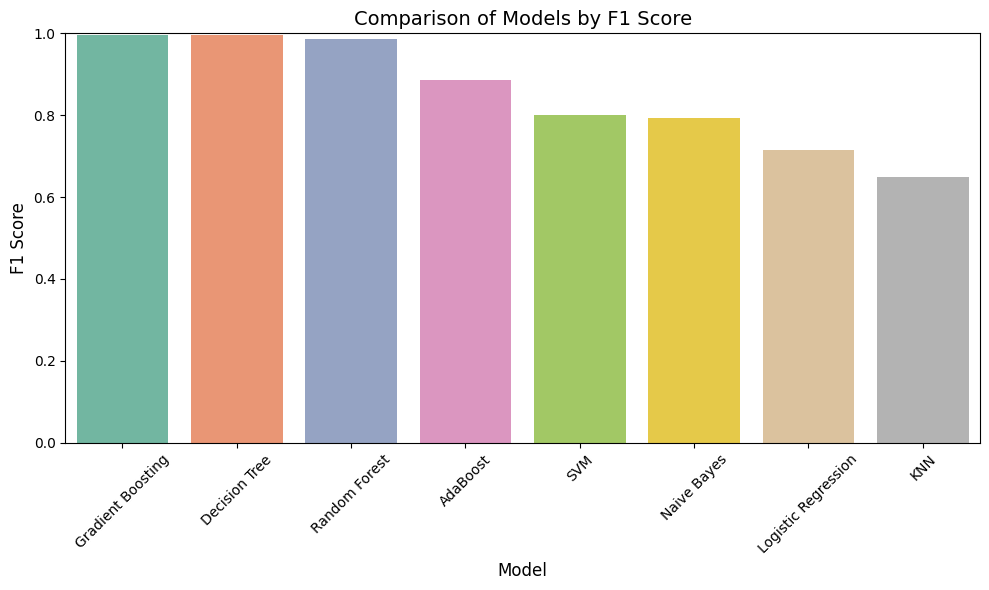

In [ ]:


# Sort the report by F1 Score (already done)
# report = report.sort_values(by="F1 Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=report, x='Model', y='F1 Score', palette="Set2")
plt.title("Comparison of Models by F1 Score", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.ylim(0, 1)  # F1 score ranges from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


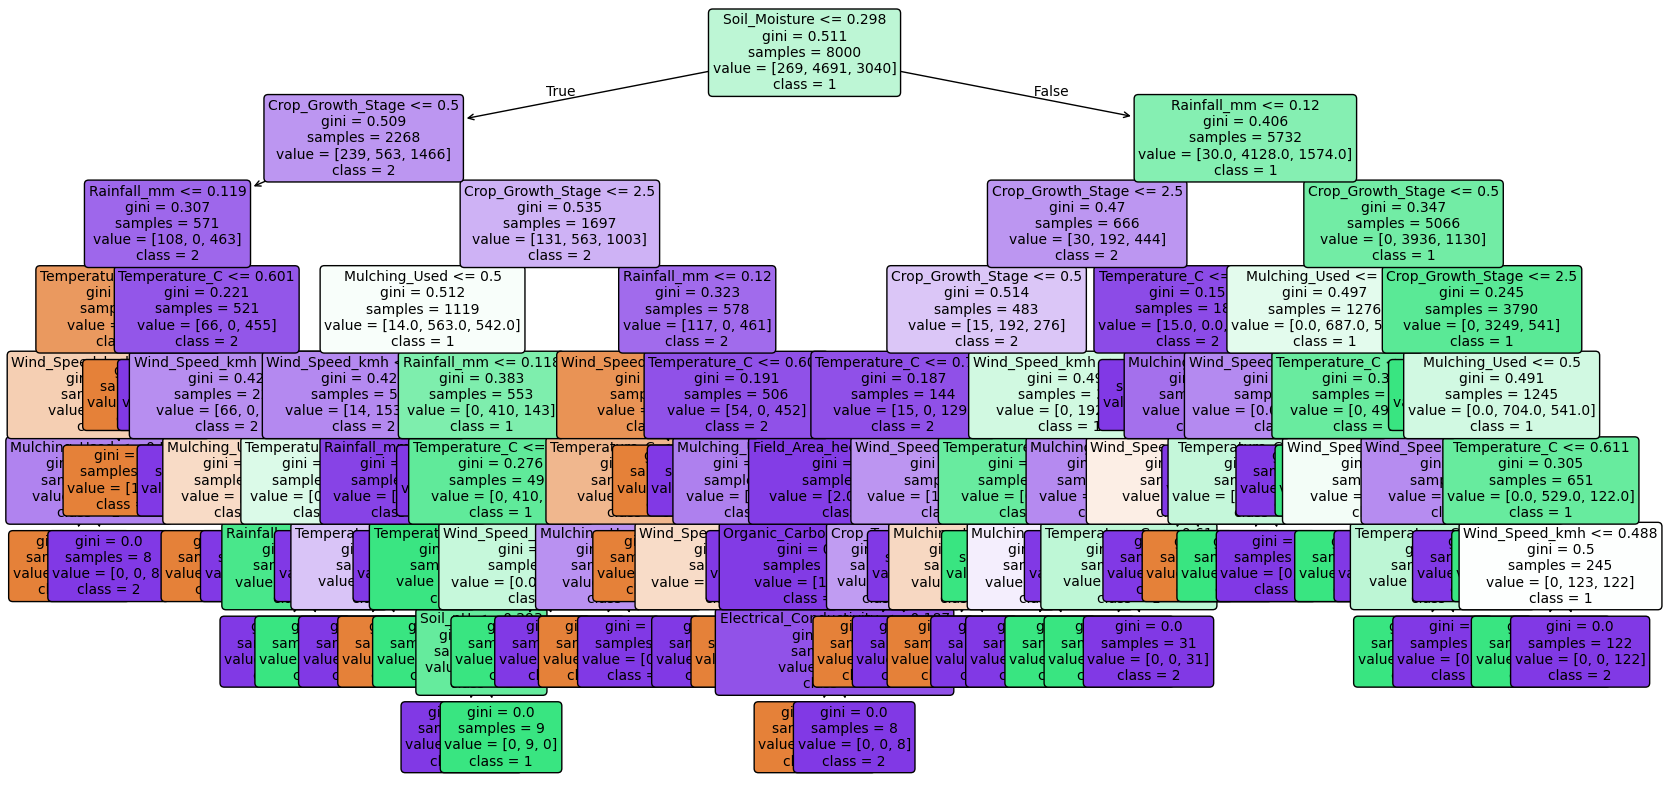

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=[str(c) for c in dt_model.classes_],
    filled=True,        # color by class
    rounded=True,       # rounded nodes
    fontsize=10
)

plt.show()


In [ ]:
from sklearn.tree import export_text
dt_model_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_limited.fit(X_train, y_train)

tree_rules = export_text(dt_model_limited, feature_names=list(X_train.columns))
print(tree_rules)


|--- Soil_Moisture <= 0.30
|   |--- Crop_Growth_Stage <= 0.50
|   |   |--- Rainfall_mm <= 0.12
|   |   |   |--- class: 0
|   |   |--- Rainfall_mm >  0.12
|   |   |   |--- class: 2
|   |--- Crop_Growth_Stage >  0.50
|   |   |--- Crop_Growth_Stage <= 2.50
|   |   |   |--- class: 1
|   |   |--- Crop_Growth_Stage >  2.50
|   |   |   |--- class: 2
|--- Soil_Moisture >  0.30
|   |--- Rainfall_mm <= 0.12
|   |   |--- Crop_Growth_Stage <= 2.50
|   |   |   |--- class: 2
|   |   |--- Crop_Growth_Stage >  2.50
|   |   |   |--- class: 2
|   |--- Rainfall_mm >  0.12
|   |   |--- Crop_Growth_Stage <= 0.50
|   |   |   |--- class: 1
|   |   |--- Crop_Growth_Stage >  0.50
|   |   |   |--- class: 1



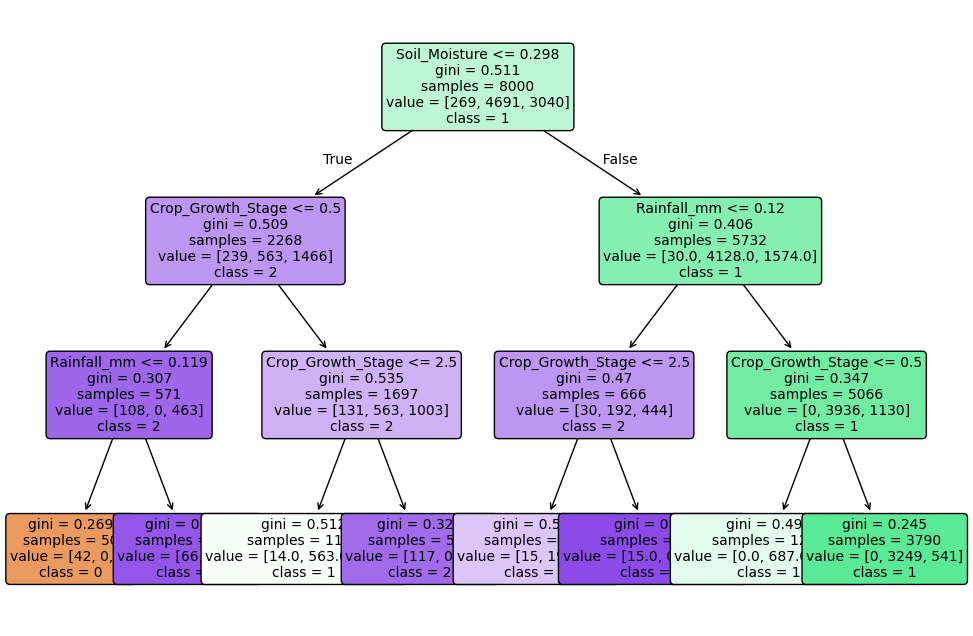

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Limit max depth
dt_model_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_limited.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(
    dt_model_limited,
    feature_names=X_train.columns,
    class_names=[str(c) for c in dt_model_limited.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
